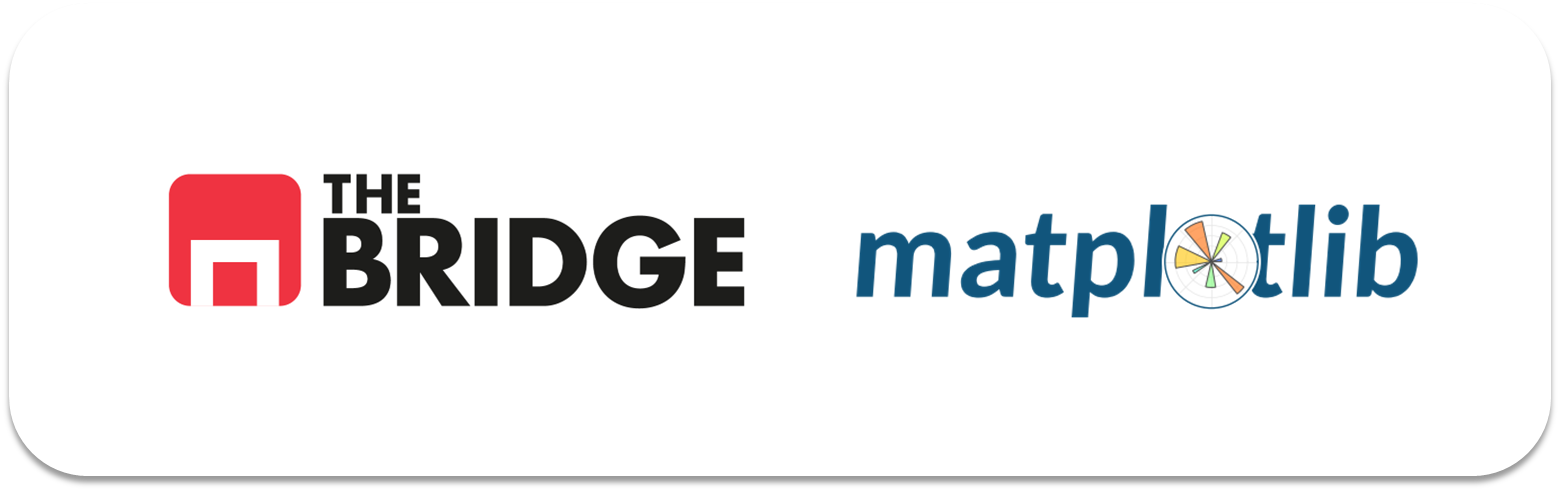

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df_cities = pd.read_csv("./data/california_cities.csv")

print("\nDescripción del dataset:")
print(df_cities.describe())

df_cities_limpio = df_cities.dropna()
df_cities_limpio.head()


Descripción del dataset:
       Unnamed: 0        latd       longd  elevation_m  elevation_ft  \
count  482.000000  482.000000  482.000000   434.000000    470.000000   
mean   240.500000   36.095088 -119.837714   180.416705    567.168723   
std    139.285678    2.298006    2.147676   309.531825   1001.265722   
min      0.000000   32.578333 -124.263333   -34.000000   -180.000000   
25%    120.250000   33.977292 -121.954931    22.000000     69.000000   
50%    240.500000   36.204722 -119.708611    67.000000    200.000000   
75%    360.750000   37.886667 -117.977292   173.500000    515.000000   
max    481.000000   41.965000 -114.596389  2402.000000   7880.000000   

       population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
count      4.820000e+02        480.000000       482.000000        481.000000   
mean       6.489493e+04         18.442183        16.840981          1.589630   
std        2.032041e+05         36.363230        32.694647          9.490386   
min  

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

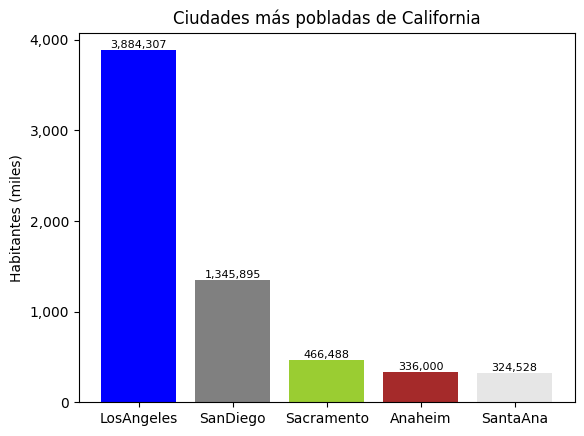

In [3]:
# 1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos
# se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)

ciudades_mas_pobladas = df_cities_limpio[["city", "population_total"]].sort_values(by="population_total", ascending=False)
categorias = ciudades_mas_pobladas["city"].head().tolist()
valores = ciudades_mas_pobladas["population_total"].head().tolist()
plt.title("Ciudades más pobladas de California")
plt.ylabel("Habitantes (miles)")
# Ajustar los valores del eje Y a miles usando `ax` directamente
ax = plt.gca()
ax.set_yticks(np.arange(0, max(valores) + 1000000, 1000000))
ax.set_yticklabels([f'{int(y/1000):,}' for y in ax.get_yticks()])

# Crear gráfico de barras
bars = plt.bar(categorias, valores, color=["blue","grey","yellowgreen","brown",".9"]);

for bar, valor in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor:,}', 
             ha='center', va='bottom', fontsize=8)


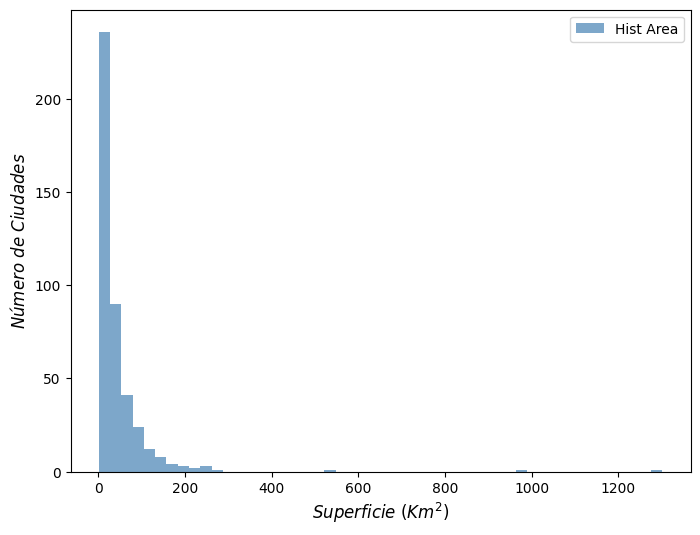

In [4]:
# 2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

lat, lon = df_cities_limpio["latd"], df_cities_limpio["longd"]
# data = df_cities_limpio["area_total_km2"]
population, area = df_cities_limpio["population_total"], df_cities_limpio["area_total_km2"]

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(area, bins=50, color="steelblue", alpha = 0.7, label="Hist Area")

# Agregar etiquetas y título
plt.xlabel(r"$Superficie$ ($Km^2$)", fontsize=12)
plt.ylabel(r"$Número$ $de$ $Ciudades$", fontsize=12)

# Mostrar leyenda
plt.legend(fontsize=10);


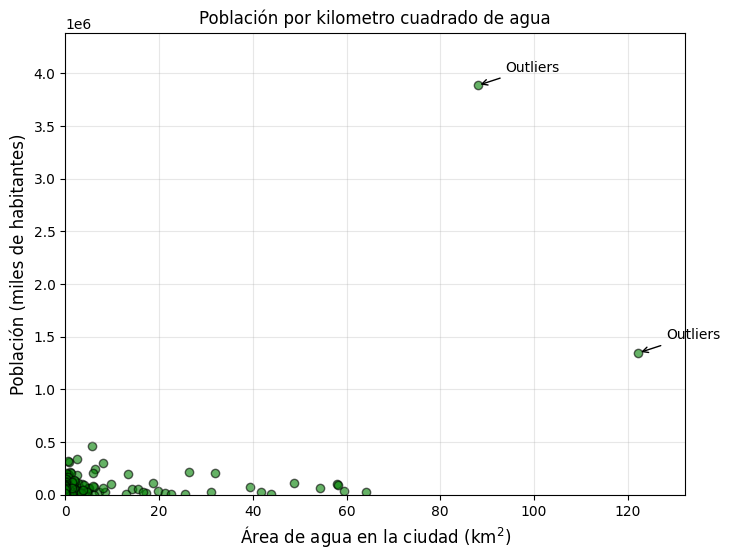

In [5]:
# 3. El scatter de área de agua de un ciudad con su poblacion.

lat, lon = df_cities_limpio["latd"], df_cities_limpio["longd"]
population, area = df_cities_limpio["population_total"], df_cities_limpio["area_water_km2"]

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    df_cities_limpio["area_water_km2"], 
    df_cities_limpio["population_total"], 
    color="green",
    alpha=0.6, 
    edgecolor="black"
)

# Ajustar los límites de los ejes para que se vean los outliers
plt.xlim(0, max(area) + 10)
plt.ylim(0, max(population) + 500000)

# Calcular percentiles para identificar outliers extremos
area_water_percentil = df_cities_limpio["area_water_km2"].quantile(0.999)  # Percentil 99 para área de agua
population_percentil = df_cities_limpio["population_total"].quantile(0.999)  # Percentil 99 para población

# Filtrar outliers extremos
outliers = df_cities_limpio[
    (df_cities_limpio["area_water_km2"] > area_water_percentil) |
    (df_cities_limpio["population_total"] > population_percentil)
]

for _, row in outliers.iterrows():
    plt.annotate(
        "Outliers", 
        (row["area_water_km2"], row["population_total"]),
        textcoords="offset points", 
        xytext=(20, 10),  # Ajustar posición de la etiqueta
        arrowprops=dict(arrowstyle="->"),  # Flecha para el outlier
        fontsize=10,
        color="black"
    )

plt.xlabel("Área de agua en la ciudad (km$^2$)", fontsize=12)
plt.ylabel("Población (miles de habitantes)", fontsize=12)

plt.title("Población por kilometro cuadrado de agua", fontsize=12)

# Mostrar la cuadrícula para facilitar la lectura
plt.grid(alpha=0.3);


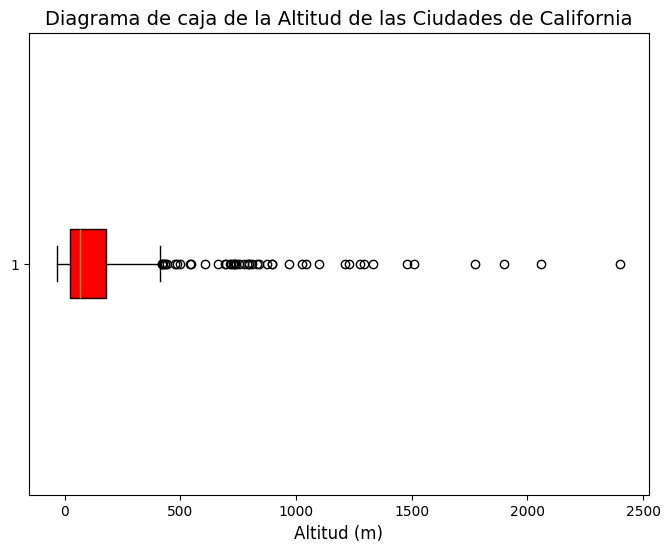

In [6]:
# 4. El boxplot de la altura de las ciudades.
plt.figure(figsize=(8, 6))
plt.boxplot(df_cities_limpio["elevation_m"], vert=False, patch_artist=True,
            boxprops=dict(facecolor="red", color="black"))

plt.title("Diagrama de caja de la Altitud de las Ciudades de California", fontsize=14)
plt.xlabel("Altitud (m)", fontsize=12);

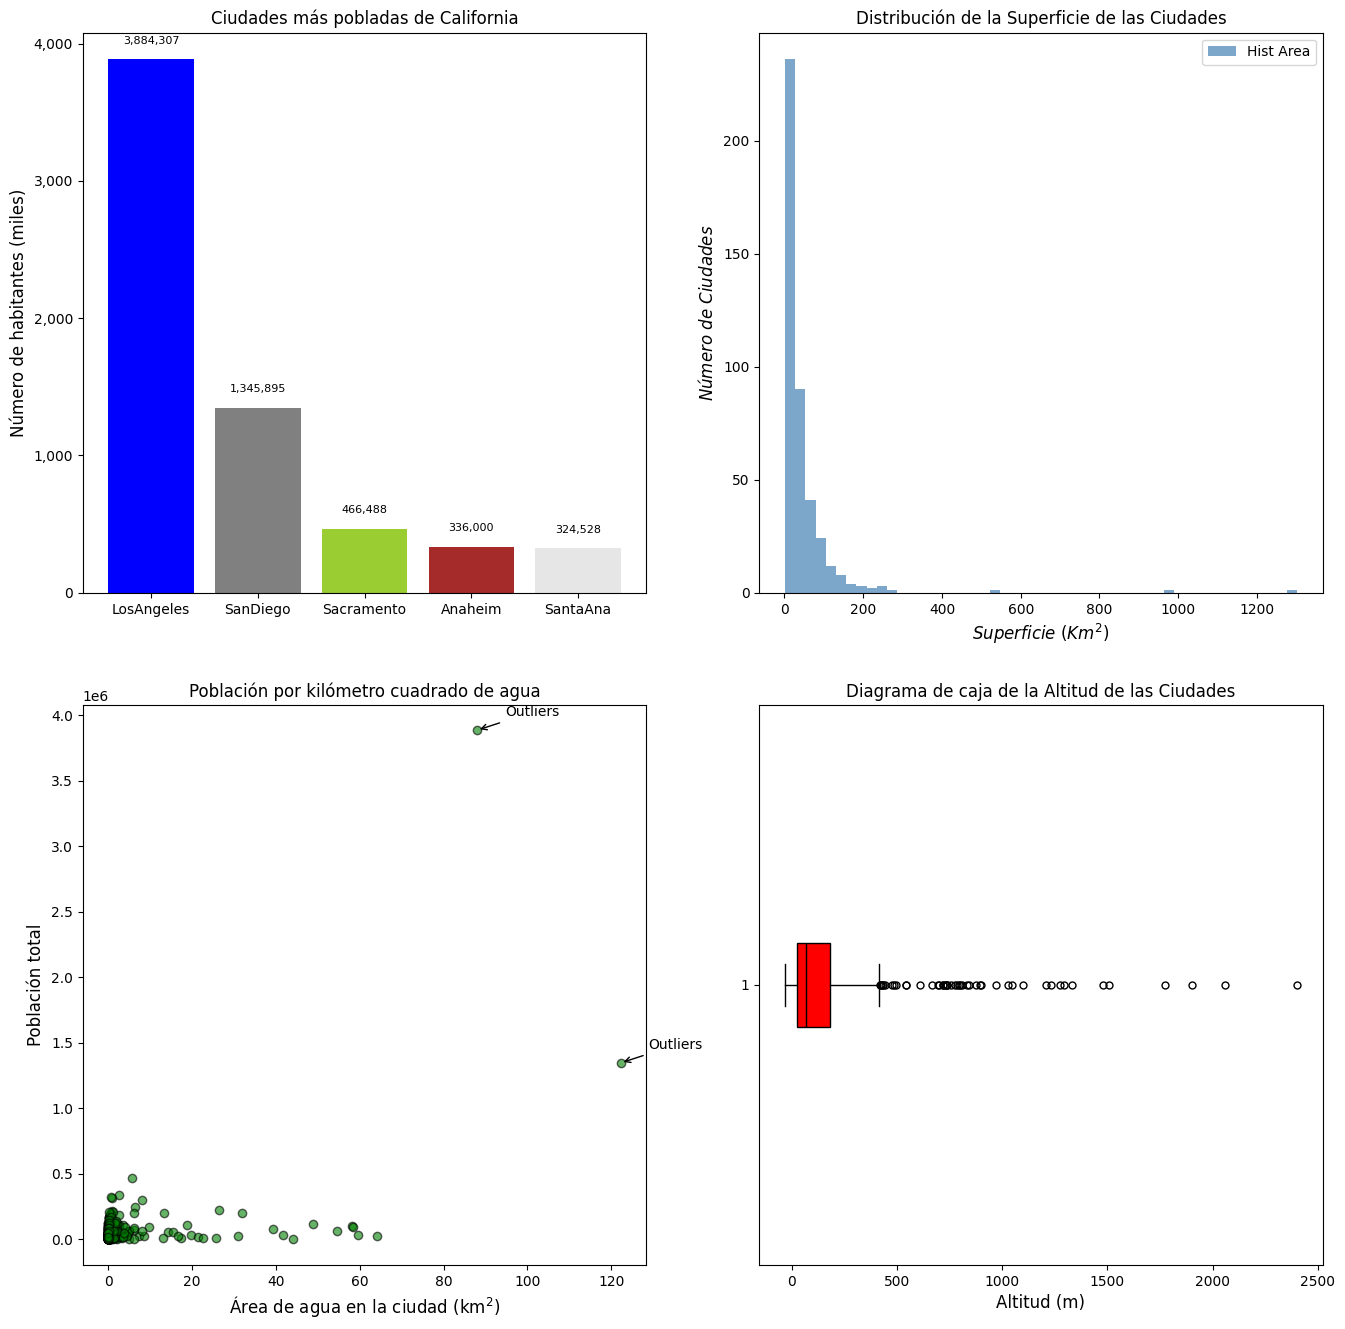

In [7]:
# Datos para cada gráfico
# Para el primer gráfico (barras)
categorias = ciudades_mas_pobladas["city"].head().tolist()
valores = ciudades_mas_pobladas["population_total"].head().tolist()

# Para el segundo gráfico (histograma)
areas = df_cities_limpio["area_total_km2"]

# Para el tercer gráfico (scatter plot)
area_water = df_cities_limpio["area_water_km2"]
population = df_cities_limpio["population_total"]

# Para el cuarto gráfico (boxplot)
elevations = df_cities_limpio["elevation_m"]

# Crear la figura general con subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# Primer gráfico: Barras
axs[0, 0].bar(categorias, valores, color=["blue","grey","yellowgreen","brown",".9"])
axs[0, 0].set_title("Ciudades más pobladas de California", fontsize=12)
axs[0, 0].set_ylabel("Número de habitantes (miles)", fontsize=12)
for i, v in enumerate(valores):
    axs[0, 0].text(i, v + 100000, f'{v:,}', ha='center', va='bottom', fontsize=8)
# Ajustar los valores del eje Y a miles usando `ax` directamente
axs[0, 0].set_yticks(np.arange(0, max(valores) + 1000000, 1000000))
axs[0, 0].set_yticklabels([f'{int(y/1000):,}' for y in axs[0, 0].get_yticks()])

# Segundo gráfico: Histograma
axs[0, 1].hist(areas, bins=50, color="steelblue", alpha=0.7, label="Hist Area")
axs[0, 1].set_title("Distribución de la Superficie de las Ciudades", fontsize=12)
axs[0, 1].set_xlabel(r"$Superficie$ ($Km^2$)", fontsize=12)
axs[0, 1].set_ylabel(r"$Número$ $de$ $Ciudades$", fontsize=12)
axs[0, 1].legend(["Hist Area"], loc="upper right", fontsize=10)

# Tercer gráfico: Scatter Plot
axs[1, 0].scatter(area_water, population, color="green", alpha=0.6, edgecolor="black")
axs[1, 0].set_title("Población por kilómetro cuadrado de agua", fontsize=12)
axs[1, 0].set_xlabel("Área de agua en la ciudad (km$^2$)", fontsize=12)
axs[1, 0].set_ylabel("Población total", fontsize=12)
# Marcar outliers en el scatter plot
area_water_percentil = df_cities_limpio["area_water_km2"].quantile(0.999)  # Percentil 99 para área de agua
population_percentil = df_cities_limpio["population_total"].quantile(0.999)  # Percentil 99 para población
# Filtrar outliers extremos
outliers = df_cities_limpio[
    (df_cities_limpio["area_water_km2"] > area_water_percentil) |
    (df_cities_limpio["population_total"] > population_percentil)
]
for _, row in outliers.iterrows():
    axs[1, 0].annotate("Outliers", 
                    (row["area_water_km2"], row["population_total"]),
                    textcoords="offset points", 
                    xytext=(20, 10),  # Ajustar posición de la etiqueta
                    arrowprops=dict(arrowstyle="->"),  # Flecha para el outlier
                    fontsize=10,
                    color="black")

# Cuarto gráfico: Boxplot
axs[1, 1].boxplot(elevations, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="red", color="black"),
                  medianprops=dict(color="black"),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(marker="o", color="black", markersize=5))
axs[1, 1].set_title("Diagrama de caja de la Altitud de las Ciudades", fontsize=12)
axs[1, 1].set_xlabel("Altitud (m)", fontsize=12);


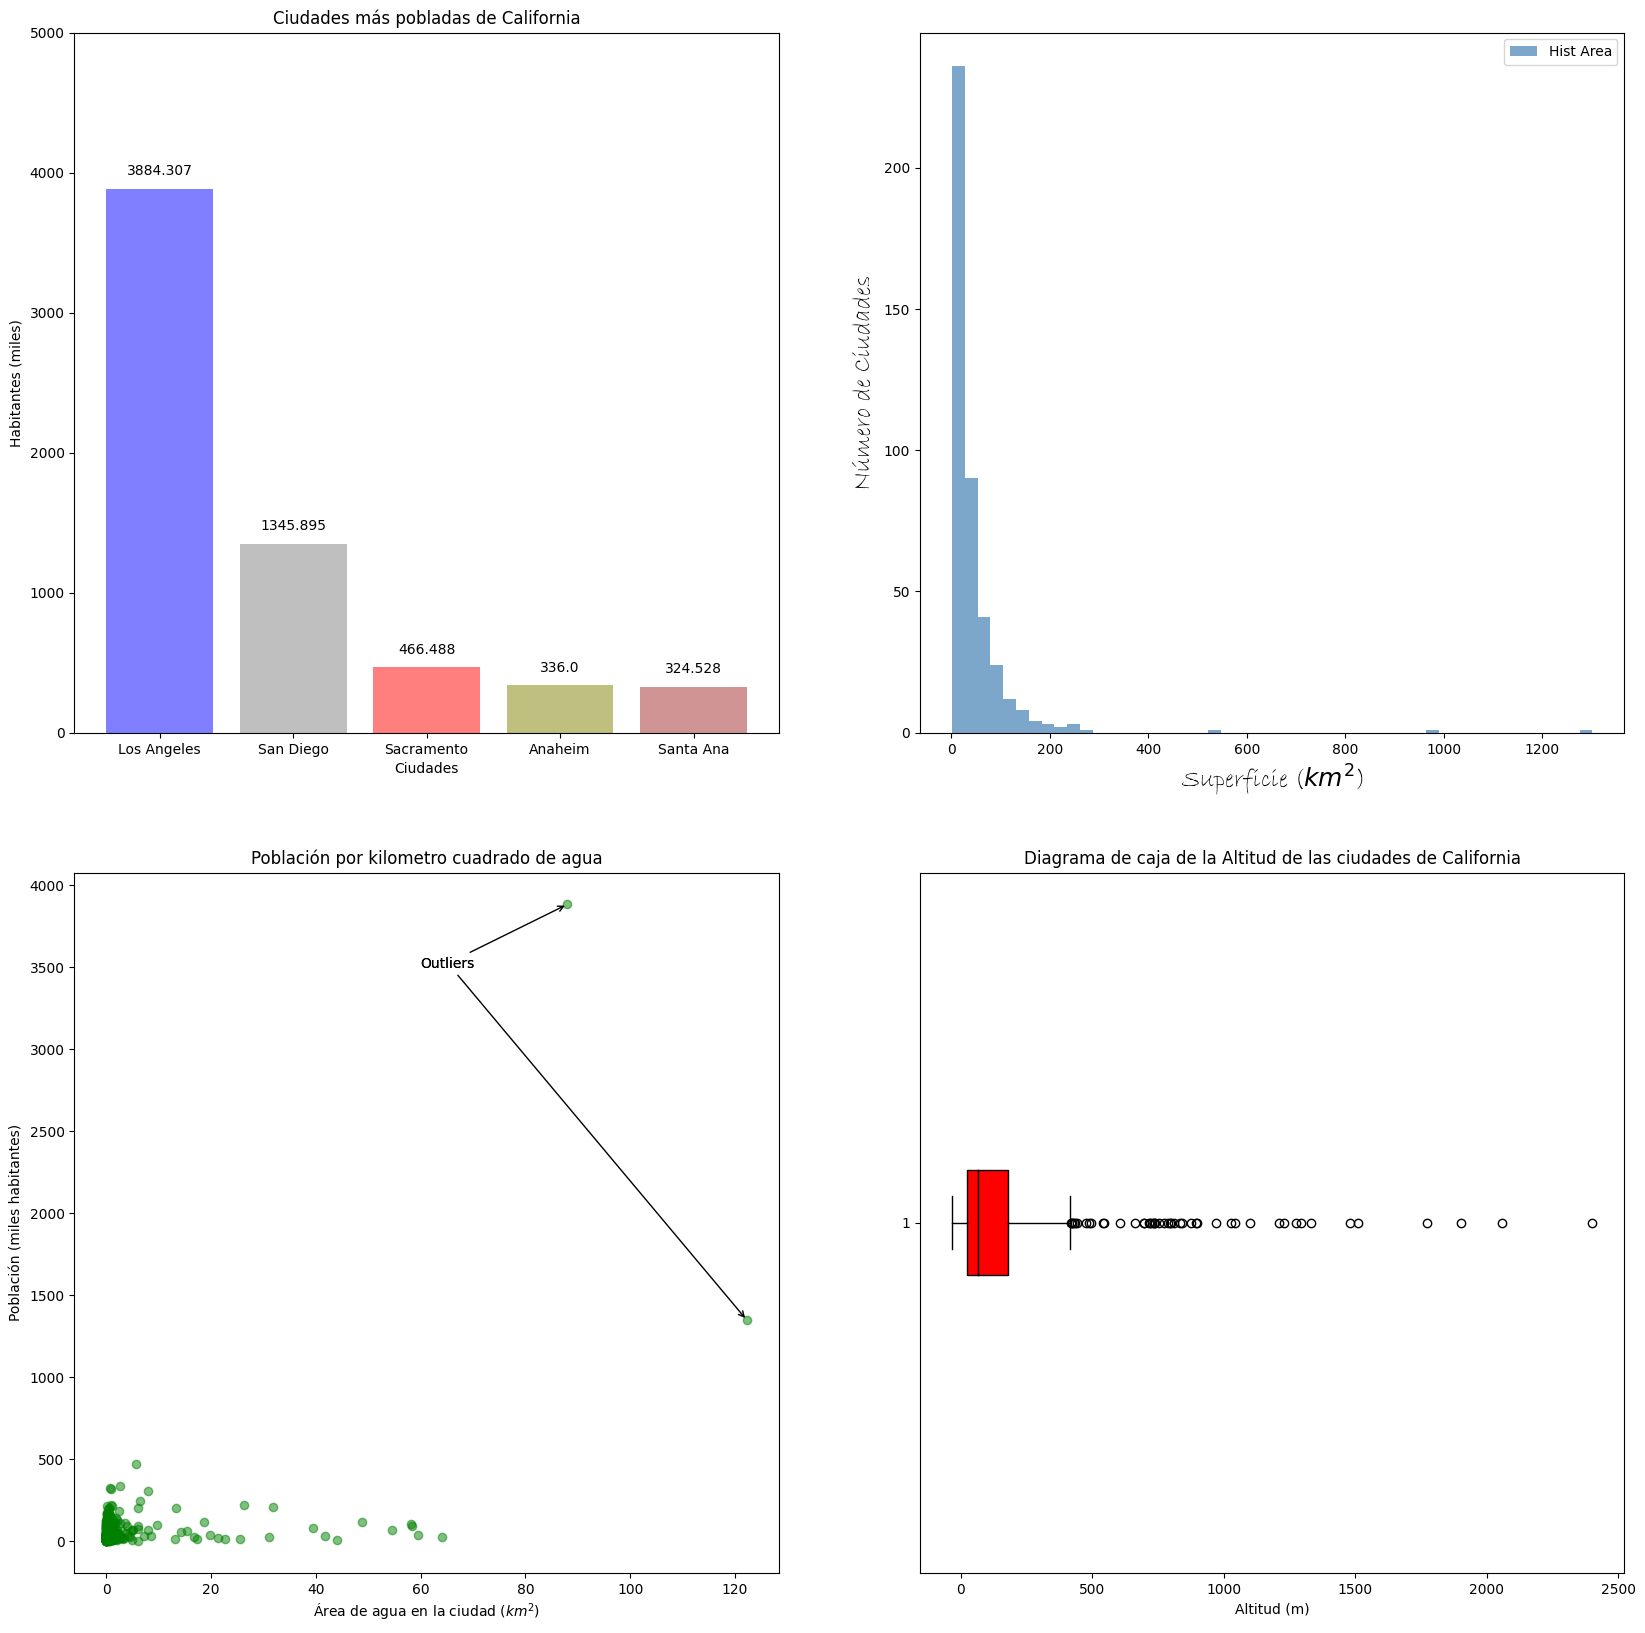

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [8]:
fig.savefig('./data/graficas.png')

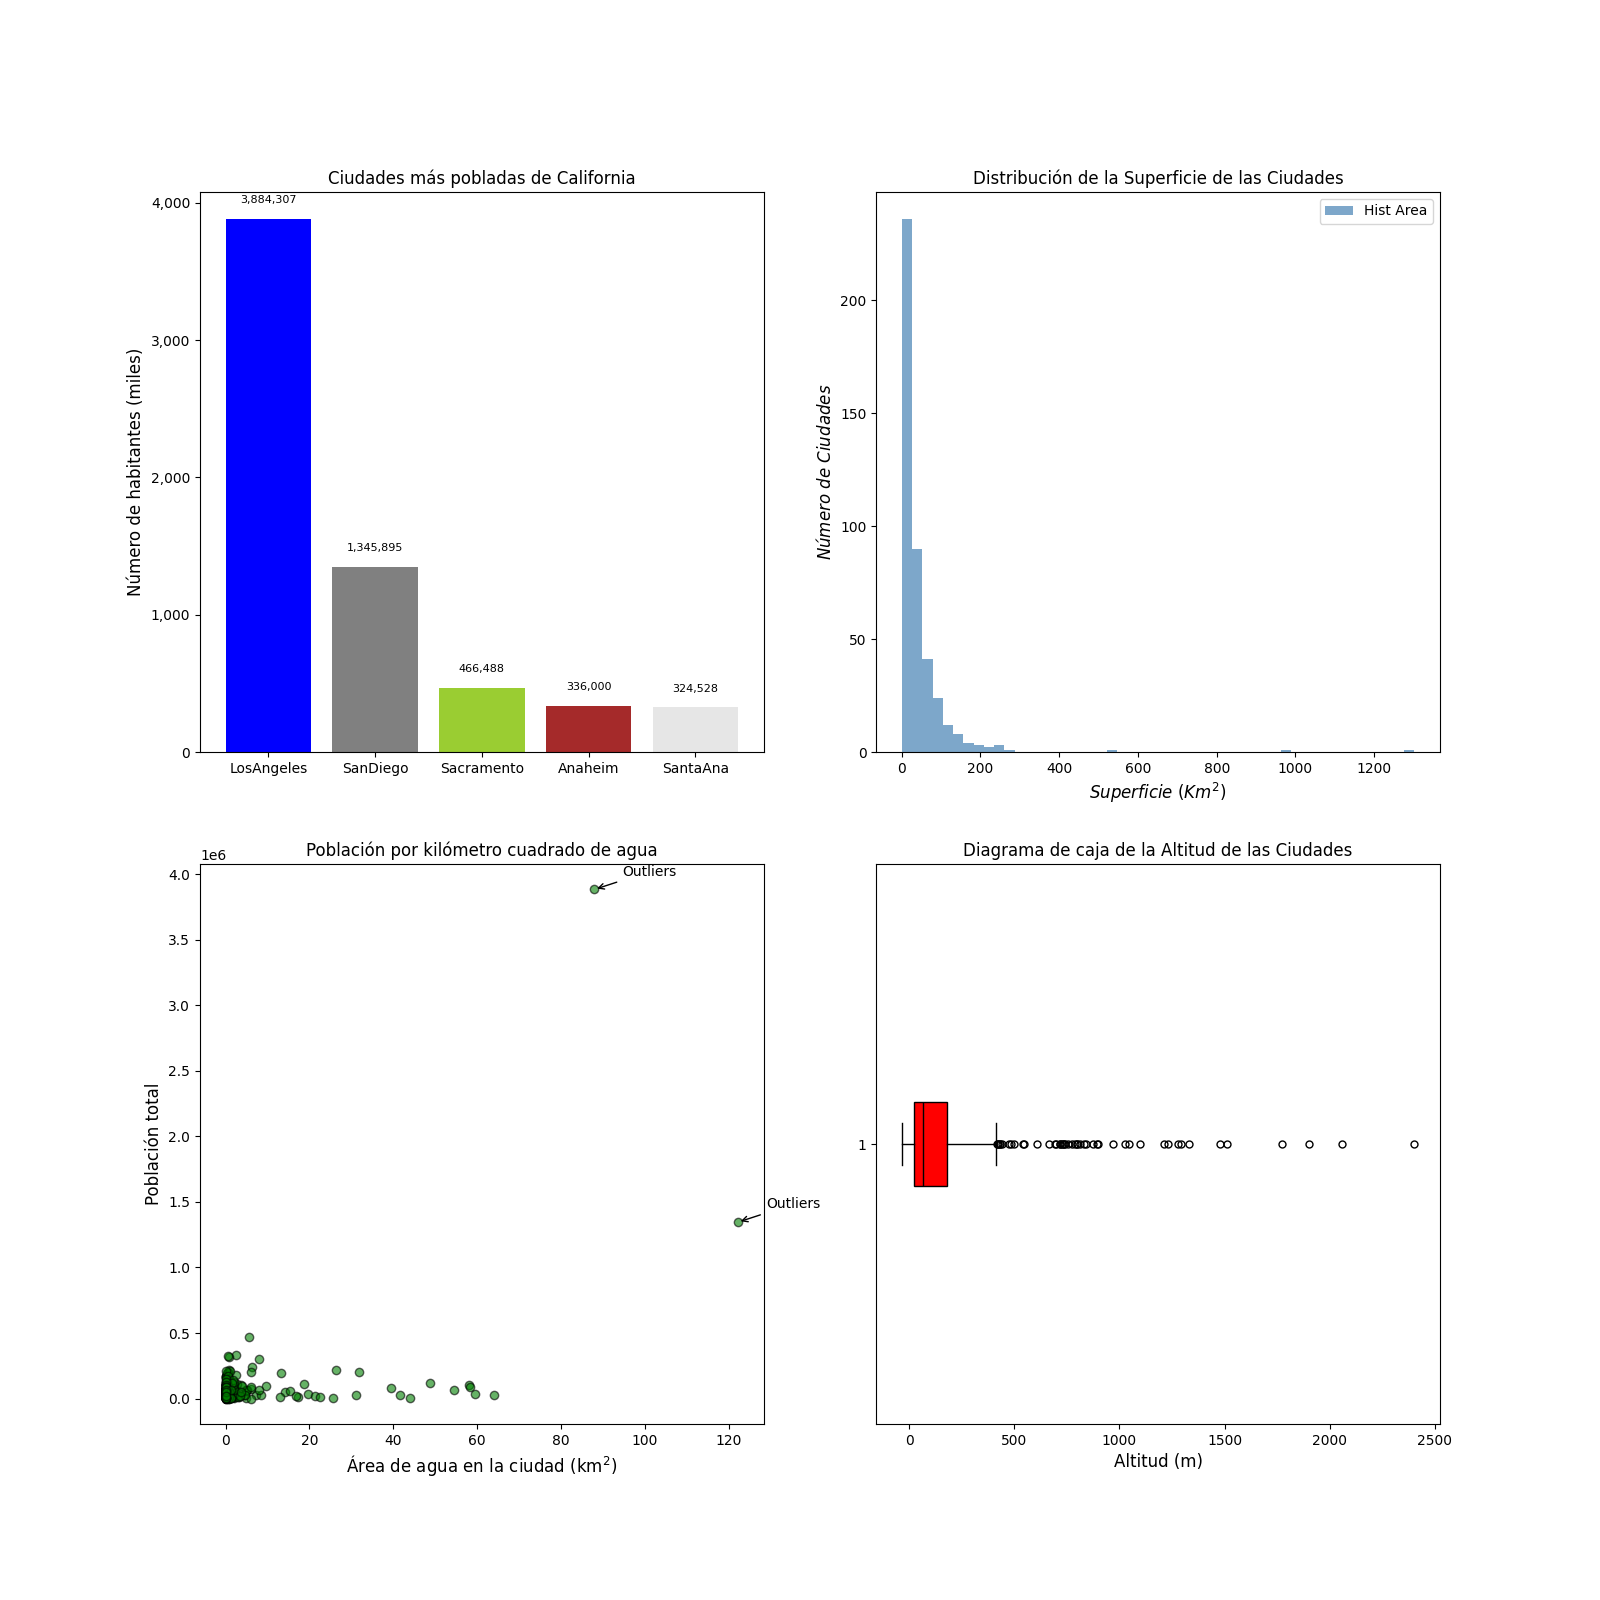

In [9]:
from IPython.display import Image
Image('./data/graficas.png')